# Brainlife analyses using Jupyter Notebooks and Python3

This example notebook will guide the user through grabbing data for their project from the secondary warehouse, compiling data across the entire project, and analyzing and visualizing the compiled results on brainlife.io via the 'Analysis' tab. This example is written for python3, and uses one of the Python3 notebook types.

Within this notebook, I will guide the user through analyses comprising derivatives generated from one of the three main datatypes available on brainlife.io, specifically neuro/dwi. Specifically, I will guide the user through:
        
    1. Load sample data for tractmeasures and parcellation statistics.
    2. doing some simple data manipulations
    3. generating simple visualizations
    
All of these functions used here are provided in a self-contained python package called "pybrainlife" [https://pypi.org/project/pybrainlife/].

First thing we'll do is load our python modules, specifically pandas, and pybrainlife!

### Import pandas and pybrainlife modules

In [1]:
import pandas as pd
from pybrainlife.data.collect import collect_data
import pybrainlife.data.manipulate as pybldm
import pybrainlife.vis.plots as pyblvp

### Load sample subjects data

Now that we have our modules, imported, we can load our sample datasets!

First, we will load our subjects dataframe using pandas! We will also build a column containing a color for each group.

In [2]:
# collect_subject_data(output data path)
subjects_data = pd.read_csv('./sample-data/subjects.csv')

# add a colors column 
subjects_data['colors'] = [ 'red' if f == 'FBL' else 'green'  if f == 'CC' else 'orange' for f in subjects_data['classID']]

# visualize the dataframe
subjects_data.head(10)

,subjectID,classID,handedness,Total_Intracranial_Volume,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
0,1_001,FBL,R,1.637511e+06,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
1,1_002,FBL,R,1.620892e+06,538920.446638,508581.400156,2.55890,268863,268649,255139.852118,253441.548038,2.55890,2.55540,red
2,1_003,FBL,R,1.486703e+06,481683.539584,443059.221044,2.55749,241030,239550,221899.018540,221160.202505,2.55749,2.54579,red
3,1_005,FBL,R,1.766135e+06,546490.743019,522998.296841,2.40854,272175,273387,263955.468537,259042.828304,2.40854,2.42101,red
4,1_006,FBL,R,1.501255e+06,451403.507457,418691.091887,2.52702,228498,221947,211522.570047,207168.521840,2.52702,2.47761,red
5,1_007,FBL,R,1.545363e+06,469951.189186,450895.893416,2.47443,234533,235020,224923.658683,225972.234733,2.47443,2.45297,red
6,1_008,FBL,R,1.535631e+06,491118.497405,495762.455547,2.56984,246130,244120,249246.987839,246515.467709,2.56984,2.53309,red
7,1_009,FBL,R,1.764675e+06,573806.886775,482924.054938,2.60063,288389,284425,243948.299587,238975.755351,2.60063,2.60179,red
8,1_012,FBL,R,1.947375e+06,602409.407777,589975.068022,2.55313,301869,298913,295935.502056,294039.565966,2.55313,2.50006,red
9,1_013,FBL,R,1.642547e+06,532817.847862,464952.854084,2.59186,266636,264317,233320.971082,231631.883002,2.59186,2.55573,red


### Load tractmeasures sample data

Now that we have our subjects information loaded, let's load some actual data!

For this notebook, we will load some example tract profile data using the collect_data function built into pybrainlife!

In [3]:
## load sample data
# collect_data(datatype name, list of datatype tags, list of object tags, filename, output file name, whether it's a network adjaceny matrix or not)
tractmeasures_df,_,_ = collect_data('tractmeasures_example')

# merge subjects data frame with tractmeasures
tractmeasures_df = tractmeasures_df.merge(subjects_data,on=['subjectID'])

# sort values by subject, tract, and node
tractmeasures_df = tractmeasures_df.sort_values(by=['subjectID','structureID','nodeID']).reset_index(drop=True)

# visualize the dataframe
tractmeasures_df.head(10)

,subjectID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,fa_inverse_mean,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
0,1_001,anterioFrontalCC,1,0.995783,0.110849,1.018341,0.107917,0.205149,0.061169,5.604224,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
1,1_001,anterioFrontalCC,2,1.014347,0.110703,0.999350,0.103949,0.218404,0.063509,5.234634,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
2,1_001,anterioFrontalCC,3,1.032649,0.111031,0.981334,0.100898,0.231633,0.065241,4.902428,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
3,1_001,anterioFrontalCC,4,1.048960,0.111824,0.965864,0.099026,0.244452,0.066175,4.603410,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
4,1_001,anterioFrontalCC,5,1.062747,0.112620,0.953217,0.097874,0.256723,0.066372,4.344360,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
5,1_001,anterioFrontalCC,6,1.074385,0.113345,0.942838,0.097237,0.268417,0.066268,4.121558,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
6,1_001,anterioFrontalCC,7,1.084192,0.114268,0.934312,0.097065,0.279238,0.066282,3.931753,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
7,1_001,anterioFrontalCC,8,1.092323,0.115122,0.927361,0.097020,0.289150,0.066565,3.774178,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
8,1_001,anterioFrontalCC,9,1.099561,0.115923,0.921268,0.097003,0.298410,0.067231,3.639786,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
9,1_001,anterioFrontalCC,10,1.105692,0.116250,0.916089,0.096613,0.306865,0.068211,3.525975,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red


### Data manipulations

Excellent! Now that we have the data loaded, let's do some simple manipulations!

First, we need to remove the first and last 10 nodes, which represents the tract terminations. We typically remove these nodes to limit the effects of "partial voluming", i.e. regions where there are many different cellular tissue types (glial cells, somas, axons, csf). These areas greatly affect the microstructural modelling data within those regions.

Once we've removed those nodes, we can then compute a tract-average for each measure and use that for our visualizations!

In [4]:
## Cut first and last 10 nodes
# cut_nodes(dataframe, number of nodes, output directory, output file base name)
tractmeasures_cut = pybldm.cut_nodes(tractmeasures_df,180,'','')

# reset index of dataframe
tractmeasures_cut = tractmeasures_cut.reset_index(drop=True)

# visualize the dataframe
tractmeasures_cut.head(10)

,subjectID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,fa_inverse_mean,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
0,1_001,anterioFrontalCC,11,1.110691,0.115940,0.911788,0.095690,0.314450,0.068854,3.427057,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
1,1_001,anterioFrontalCC,12,1.114725,0.115260,0.908289,0.094500,0.321202,0.069319,3.345522,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
2,1_001,anterioFrontalCC,13,1.118011,0.114413,0.905413,0.093307,0.327210,0.069715,3.276095,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
3,1_001,anterioFrontalCC,14,1.120420,0.113232,0.903251,0.091935,0.332303,0.070072,3.218872,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
4,1_001,anterioFrontalCC,15,1.122213,0.112004,0.901555,0.090663,0.336453,0.070573,3.172803,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
5,1_001,anterioFrontalCC,16,1.123747,0.110885,0.900129,0.089659,0.339709,0.071542,3.141979,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
6,1_001,anterioFrontalCC,17,1.125012,0.110260,0.898991,0.089051,0.342142,0.073051,3.125654,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
7,1_001,anterioFrontalCC,18,1.126078,0.109918,0.898053,0.088628,0.343857,0.075198,3.121429,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
8,1_001,anterioFrontalCC,19,1.126909,0.109880,0.897349,0.088391,0.344914,0.078106,3.131497,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
9,1_001,anterioFrontalCC,20,1.127476,0.109878,0.896834,0.088049,0.345405,0.081686,3.153164,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red


In [5]:
## Compute tract-average data
# compute_mean_data(output directory, dataframe, output basename)
tractmeasures_cut_mean = pybldm.compute_mean_data('',tractmeasures_cut,'')

# readd handedness and colors columns as the mean function removes these
tractmeasures_cut_mean = tractmeasures_cut_mean.merge(subjects_data[['subjectID','handedness','colors']],on='subjectID')

# visualize dataframe
tractmeasures_cut_mean.head(10)

,subjectID,classID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,...,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,handedness,colors
0,1_001,FBL,anterioFrontalCC,1,1.360051,0.200187,0.769157,0.099937,0.434496,0.131440,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
1,1_001,FBL,forcepsMajor,1,1.421196,0.198930,0.723688,0.098614,0.619968,0.133076,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
2,1_001,FBL,forcepsMinor,1,1.309140,0.182775,0.794148,0.098665,0.450354,0.121946,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
3,1_001,FBL,leftAnterioFrontoCerebellar,1,1.141597,0.215825,0.919115,0.169924,0.475503,0.138428,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
4,1_001,FBL,leftArc,1,1.122553,0.118781,0.904481,0.098794,0.437965,0.115683,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
5,1_001,FBL,leftAslant,1,1.199594,0.094128,0.845318,0.067538,0.346239,0.077242,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
6,1_001,FBL,leftCST,1,1.151446,0.167583,0.893786,0.135665,0.517627,0.117125,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
7,1_001,FBL,leftContraAnterioFrontoCerebellar,1,1.130560,0.204788,0.920732,0.154507,0.479979,0.138997,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
8,1_001,FBL,leftContraMotorCerebellar,1,1.196410,0.208176,0.869950,0.142720,0.514112,0.129842,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red
9,1_001,FBL,leftIFOF,1,1.251885,0.134856,0.811576,0.088536,0.484637,0.101116,...,451828.757461,2.54607,252829.0,253655.0,226482.442757,225346.314703,2.54607,2.54544,R,red


### Data visualizations

Excellent! Now that we have our data loaded and manipulated, we can start making some quick visualizations!

pybrainlife contains many functions for generating visualizations, including tract profile plots and scatterplots!

First, let's make a figure describing the tract fractional anisotropy (FA) profile averaged for each group to see if there are any group differences in the anterior frontal corpus callosum (anterioFrontalCC) tract!

anterioFrontalCC
fa


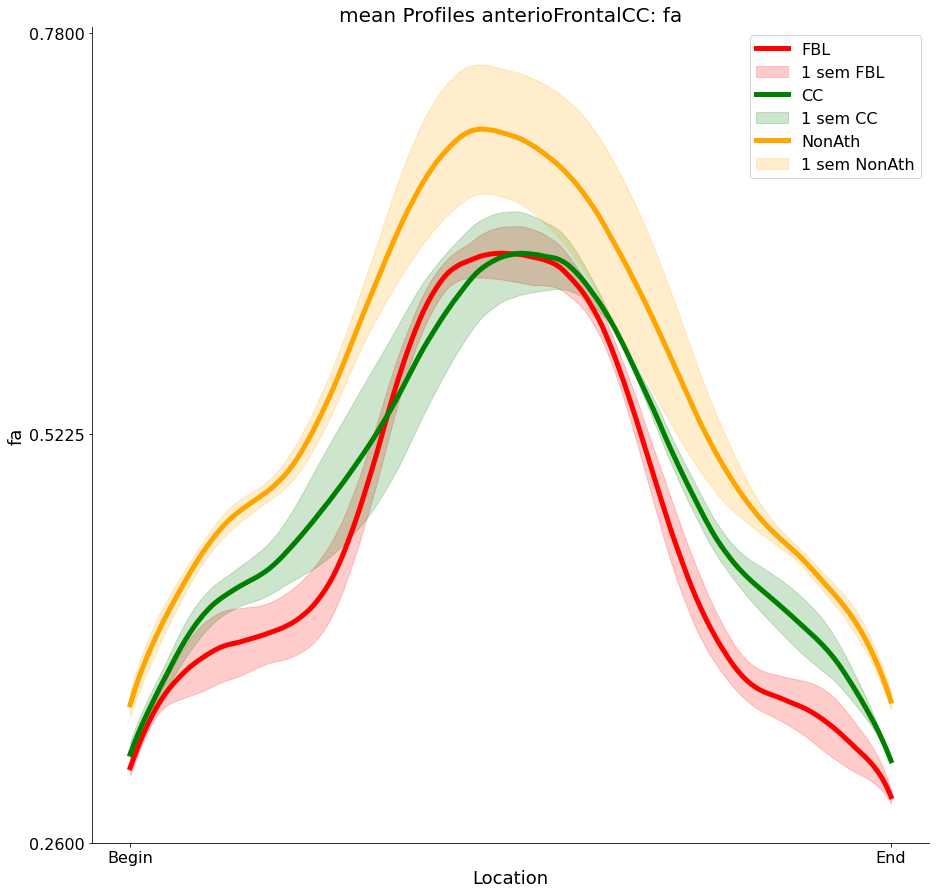

In [6]:
## Make profilometry plot for group averaged FA for the anterior frontal corpus callosum tract
# plot_profiles(list of structure names, dataframe, list of measures to make plot for, 
# summary method: 'mean','max','min'; error bars: 'sd' or 'sem'; output folder, output file name)
pyblvp.plot_profiles(['anterioFrontalCC'],tractmeasures_cut,['fa'],'mean','sem','','')

Beautiful! It looks like there appears to be some separation between our groups, with athletes (i.e. FB and CC) having lower FA than non-athletes!

Next, let's generate a scatter plot comparing the tract average FA for all tracts and groups with the tract average orientation dispersion index (ODI)!

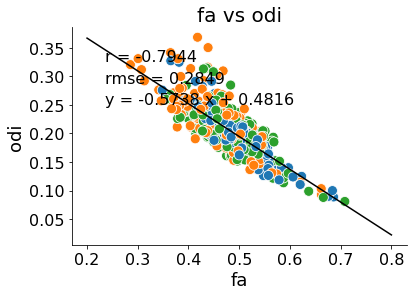

In [7]:
## Generate scatterplot comparing tract average FA with ODI
# singleplot_scatter(dictionary of subject colors (just leave as empty string), 
# x-axis dataframe, y-axis dataframe, x-axis measure, y-axis measure, log x axis (true or false), 
# legend measure, measure to color dots based on, how to summarize data (ravel, average, append), 
# linear regression or equality line, set opactiy based on distance from line of regression, 
# compute slope or use slope of 1, shuffle data, output folder, output file name)
pyblvp.singleplot_scatter('',tractmeasures_cut_mean,tractmeasures_cut_mean,'fa','odi',False,'classID','classID','ravel','linreg',True,False,False,'','','')

From this, we can see a strong relationship (r = -0.7944) between white matter tract FA and it's ODI, where tracts with higher FA typically have lower ODI, that doesn't appear to be dependent on group status!

I wonder if this same relationship holds in the cortex!

Let's look!

### Cortical analysis

First, let's load our sample cortical data containing the same measures as our tractmeasures example data, but this time describing properties of cortical regions!

In [8]:
## load sample data
cortex_df,_,_ = collect_data('cortex_example')

# merge subjects data frame with tractmeasures
cortex_df = cortex_df.merge(subjects_data,on='subjectID')

# sort values by subject, parcel, and parcellation
cortex_df = cortex_df.sort_values(by=['subjectID','structureID','parcellationID']).reset_index(drop=True)

# visualize the dataframe
cortex_df.head(10)

,subjectID,structureID,parcellationID,md,snr,ad,goodvertex,rd,ndi,isovf,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
0,1_001,lh_G_Ins_lg_and_S_cent_ins,aparc.a2009s,1.0338,30.6692,1.1442,1.0000,0.9786,0.2567,0.1581,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
1,1_001,lh_G_and_S_cingul-Ant,aparc.a2009s,0.9944,26.6948,1.0861,0.9973,0.9485,0.2175,0.1155,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
2,1_001,lh_G_and_S_cingul-Mid-Ant,aparc.a2009s,1.1978,27.3097,1.2805,1.0000,1.1565,0.2419,0.2556,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
3,1_001,lh_G_and_S_cingul-Mid-Post,aparc.a2009s,1.0254,28.9323,1.1065,1.0000,0.9848,0.2605,0.1628,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
4,1_001,lh_G_and_S_occipital_inf,aparc.a2009s,1.1236,27.2247,1.1888,0.9757,1.0910,0.3004,0.2384,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
5,1_001,lh_G_and_S_paracentral,aparc.a2009s,1.2967,25.1730,1.3679,1.0000,1.2612,0.3009,0.3145,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
6,1_001,lh_G_and_S_subcentral,aparc.a2009s,0.9505,31.8654,1.0214,1.0000,0.9150,0.2649,0.1125,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
7,1_001,lh_G_and_S_transv_frontopol,aparc.a2009s,1.0359,21.0627,1.1182,1.0000,0.9947,0.1983,0.1272,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
8,1_001,lh_G_cingul-Post-dorsal,aparc.a2009s,0.9372,31.6811,1.0186,1.0000,0.8965,0.2559,0.1039,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
9,1_001,lh_G_cingul-Post-ventral,aparc.a2009s,1.0982,25.8333,1.1937,1.0000,1.0504,0.3785,0.2324,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red


For this example, let's just look at cortical data from the Destrieux atlas (i.e. aparc.a2009s).

To do this, we can just use some simple pandas .loc functionality to identify only those data that correspond to the Destrieux atlas

In [9]:
## subsample data for only parcels in aparc.a2009s
cortex_df_destrieux = cortex_df.loc[cortex_df['parcellationID'] == 'aparc.a2009s'].reset_index(drop=True)

# visualize the dataframe
cortex_df_destrieux.head(10)

,subjectID,structureID,parcellationID,md,snr,ad,goodvertex,rd,ndi,isovf,...,Total_Graymatter_Volume,Total_Whitematter_Volume,Total_Cortical_Thickness,Left_Graymatter_Volume,Right_Graymatter_Volume,Left_Whitematter_Volume,Right_Whitematter_Volume,Left_Graymatter_Thickness,Right_Graymatter_Thickness,colors
0,1_001,lh_G_Ins_lg_and_S_cent_ins,aparc.a2009s,1.0338,30.6692,1.1442,1.0000,0.9786,0.2567,0.1581,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
1,1_001,lh_G_and_S_cingul-Ant,aparc.a2009s,0.9944,26.6948,1.0861,0.9973,0.9485,0.2175,0.1155,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
2,1_001,lh_G_and_S_cingul-Mid-Ant,aparc.a2009s,1.1978,27.3097,1.2805,1.0000,1.1565,0.2419,0.2556,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
3,1_001,lh_G_and_S_cingul-Mid-Post,aparc.a2009s,1.0254,28.9323,1.1065,1.0000,0.9848,0.2605,0.1628,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
4,1_001,lh_G_and_S_occipital_inf,aparc.a2009s,1.1236,27.2247,1.1888,0.9757,1.0910,0.3004,0.2384,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
5,1_001,lh_G_and_S_paracentral,aparc.a2009s,1.2967,25.1730,1.3679,1.0000,1.2612,0.3009,0.3145,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
6,1_001,lh_G_and_S_subcentral,aparc.a2009s,0.9505,31.8654,1.0214,1.0000,0.9150,0.2649,0.1125,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
7,1_001,lh_G_and_S_transv_frontopol,aparc.a2009s,1.0359,21.0627,1.1182,1.0000,0.9947,0.1983,0.1272,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
8,1_001,lh_G_cingul-Post-dorsal,aparc.a2009s,0.9372,31.6811,1.0186,1.0000,0.8965,0.2559,0.1039,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red
9,1_001,lh_G_cingul-Post-ventral,aparc.a2009s,1.0982,25.8333,1.1937,1.0000,1.0504,0.3785,0.2324,...,507908.336299,451828.757461,2.54607,252829,253655,226482.442757,225346.314703,2.54607,2.54544,red


### Data visualizations

Now, let's compute the same scatterplot as we did with the tract-average data to see if the same relationship exists in the cortex between FA and ODI!

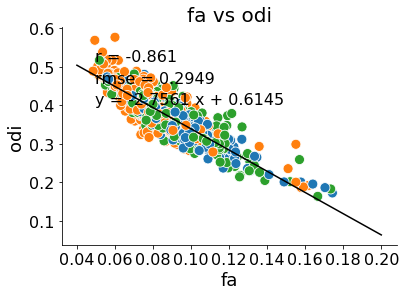

In [10]:
## Generate scatterplot comparing tract average FA with ODI
# singleplot_scatter(dictionary of subject colors (just leave as empty string), 
# x-axis dataframe, y-axis dataframe, x-axis measure, y-axis measure, log x axis (true or false), 
# legend measure, measure to color dots based on, how to summarize data (ravel, average, append), 
# linear regression or equality line, set opactiy based on distance from line of regression, 
# compute slope or use slope of 1, shuffle data, output folder, output file name)
pyblvp.singleplot_scatter('',cortex_df_destrieux,cortex_df_destrieux,'fa','odi',False,'classID','classID','ravel','linreg',True,False,False,'','','')

From this, we can see an even stronger relationship (r = -0.861) between cortical parcel FA and it's ODI, where parcels with higher FA typically have lower ODI, that doesn't appear to be dependent on group status!

## You've now completed your first set of analyses on brainlife.io using the pybrainlife module!